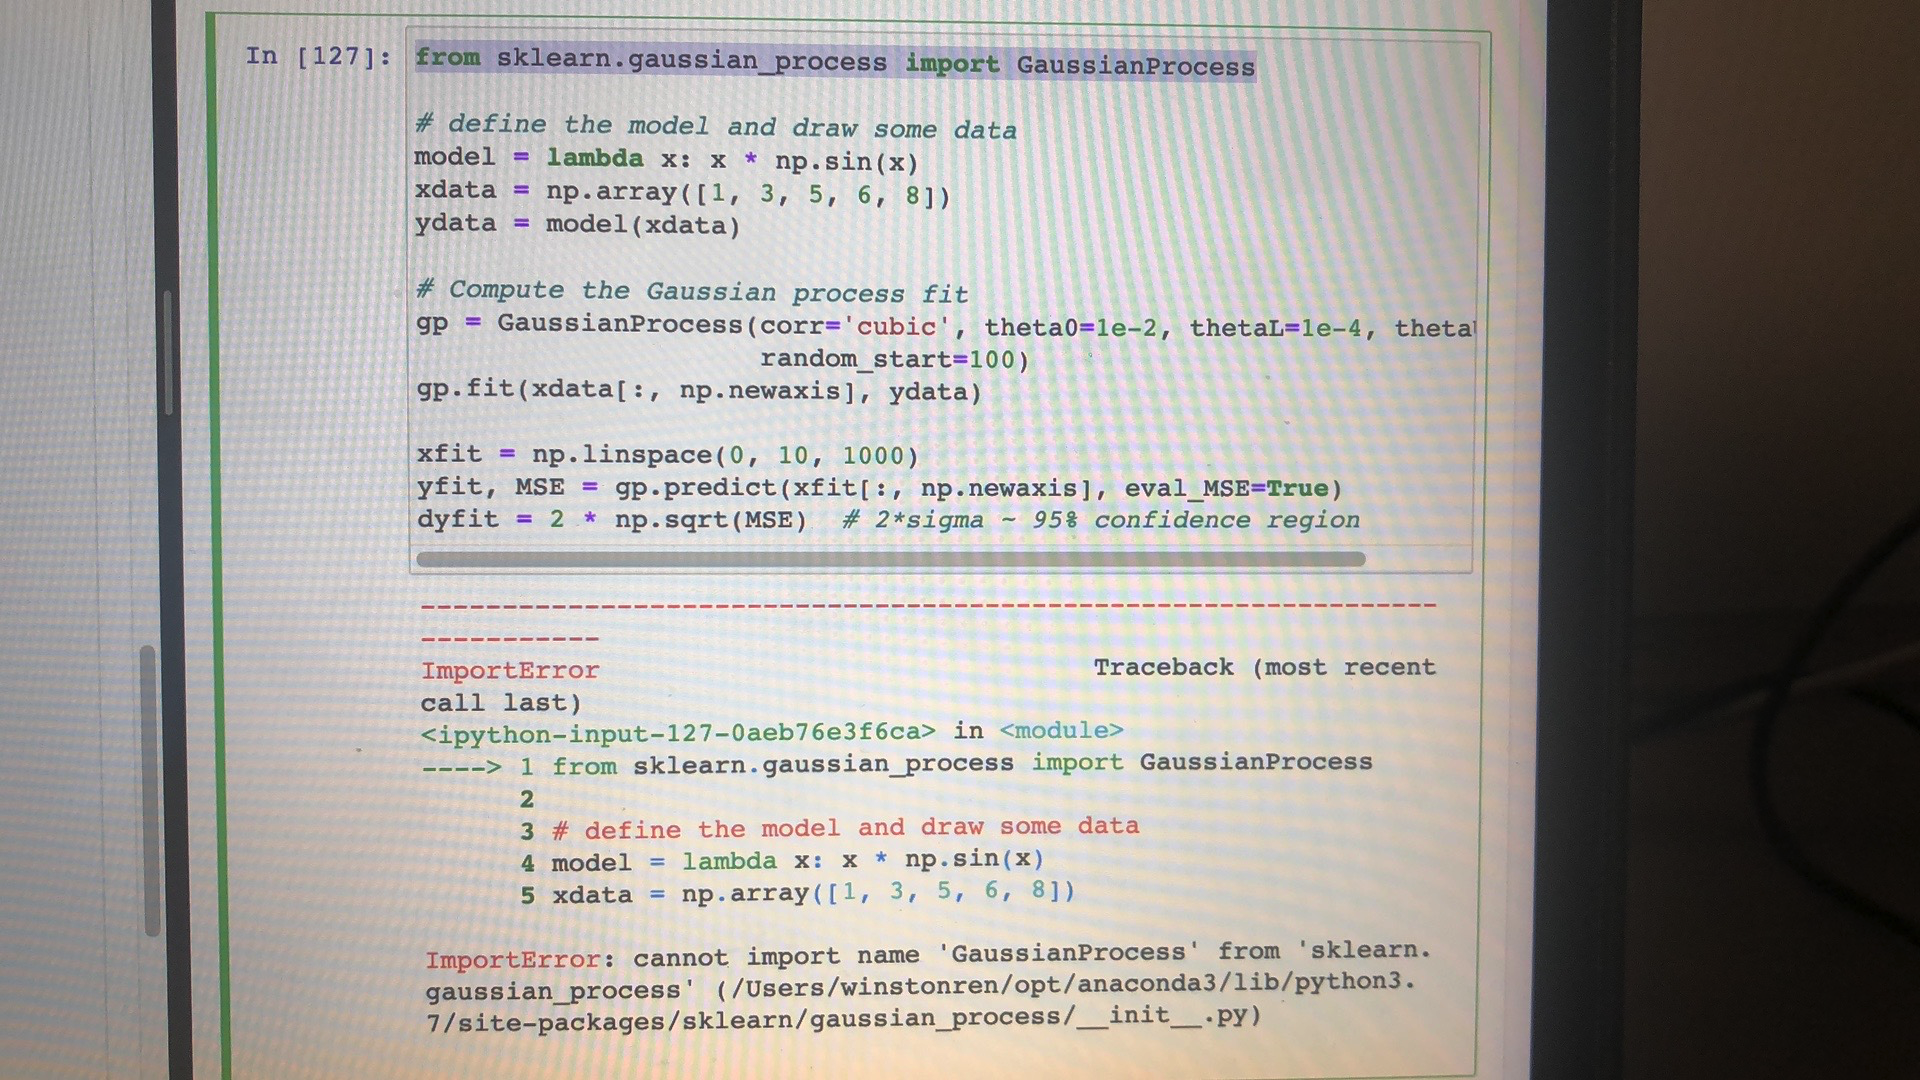

https://stackoverflow.com/questions/57770684/importerror-cannot-import-name-gaussianprocess-from-sklearn-gaussian-process


In [52]:
from sklearn.gaussian_process import GaussianProcessRegressor 
#from sklearn.gaussian_process import GaussianProcessClassifier 
import numpy as np

model = lambda x: x*np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
gp = GaussianProcessRegressor()
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 100)
ytest = model(xfit)
yfit, stds = gp.predict(xfit[:, np.newaxis],  return_std=True)
#dyfit = 2*np.sqrt(MSE) # 2*sigma-95% confidence region

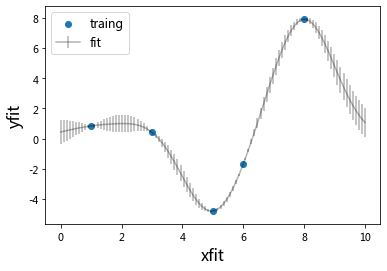

In [57]:
import matplotlib.pyplot as plt
plt.errorbar(xfit, yfit, stds,  fmt='-k', alpha = 0.3, label = 'fit') #linestyle='None', marker='^',
plt.scatter(xdata, ydata,label='traing')
plt.xlabel('xfit',fontsize = 16)
plt.ylabel('yfit',fontsize = 16)
plt.legend(fontsize = 12)
plt.show()

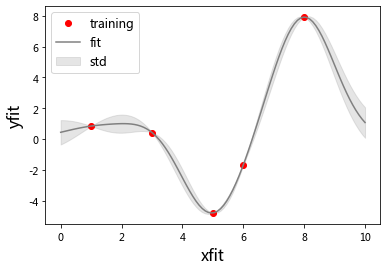

In [63]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.03-errorbars.html
plt.plot(xdata, ydata, 'or', label = 'training')
plt.plot(xfit, yfit, '-', color='gray', label = 'fit')

plt.fill_between(xfit, yfit - stds, yfit + stds,
                 color='gray', alpha=0.2, label = 'std')
plt.xlabel('xfit',fontsize = 16)
plt.ylabel('yfit',fontsize = 16)
plt.legend(fontsize = 12)
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

print('MSE: %.4f' % mean_squared_error(ytest, yfit))
print('R2 score: %.4f' % r2_score(ytest, yfit))
print('Variance score: %.4f' % explained_variance_score(ytest, yfit))

MSE: 1.7919
R2 score: 0.8696
Variance score: 0.8801
